In [1]:
import pandas as pd
import numpy as np

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [4]:
df=pd.DataFrame()

In [5]:
df["x1"]=[1,2,3,4,5,6,6,7,9,9]
df["x2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,0,1,0]

In [6]:
import seaborn as sns 

<Axes: xlabel='x1', ylabel='x2'>

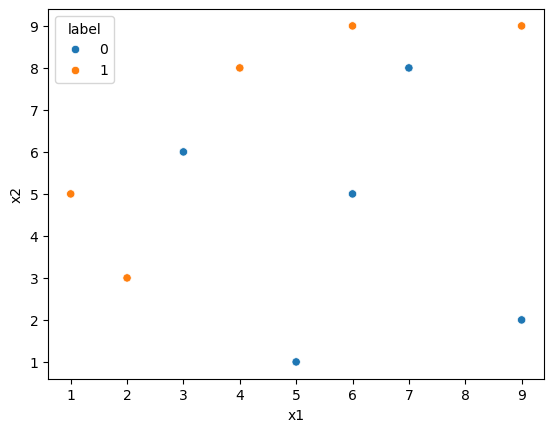

In [7]:
sns.scatterplot(x=df["x1"],y=df["x2"],hue=df["label"])

In [8]:
df.shape 

(10, 3)

In [9]:
df.shape[0]

10

In [10]:
df["sample_weights"]=1/df.shape[0]

In [11]:
df

,x1,x2,label,sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,0,0.1
8,9,9,1,0.1
9,9,2,0,0.1


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)

In [13]:
x=df.iloc[:,0:2]

In [14]:
x

,x1,x2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [15]:
y=y=df.iloc[:,2]

In [16]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    1
9    0
Name: label, dtype: int64

In [17]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [18]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

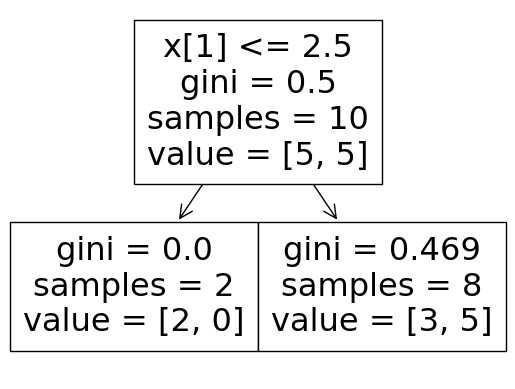

In [19]:
plot_tree(dt1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

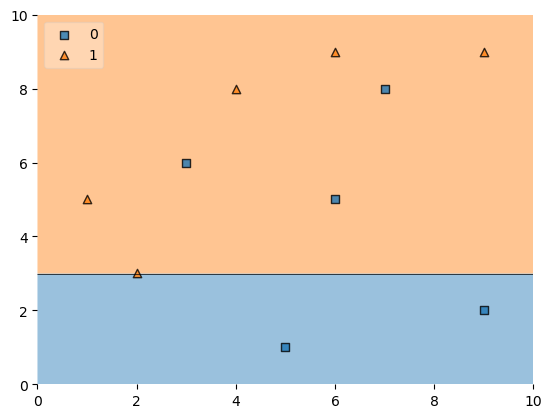

In [20]:
plot_decision_regions(np.array(x),np.array(y),clf=dt1,legend=2)

In [21]:
df["y_pred"]=dt1.predict(x)

In [22]:
df

,x1,x2,label,sample_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,0,0.1,1
8,9,9,1,0.1,1
9,9,2,0,0.1,0


performance of the stub

In [23]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [24]:
alpha=calculate_model_weight(0.3)

In [25]:
alpha

0.42364893019360184

calculate the updated weight 

In [29]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['sample_weights']*np.exp(-alpha)
    else:
        return row['sample_weights']*np.exp(alpha)

In [30]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [31]:
df

,x1,x2,label,sample_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,0,0.1,1,0.152653
8,9,9,1,0.1,1,0.065508
9,9,2,0,0.1,0,0.065508


In [32]:
df['sample_weights'].sum()

1.0

In [33]:
df["updated_weights"].sum()

0.9165153319682015

In [34]:
df["normalised_weights"]=df["updated_weights"]/df["updated_weights"].sum()

In [35]:
df

,x1,x2,label,sample_weights,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,0,0.1,1,0.152653,0.166559
8,9,9,1,0.1,1,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [36]:
df["normalised_weights"].sum()

1.0

In [37]:
np.cumsum(df['normalised_weights'])

0    0.071475
1    0.142950
2    0.309508
3    0.380983
4    0.452458
5    0.523933
6    0.690492
7    0.857050
8    0.928525
9    1.000000
Name: normalised_weights, dtype: float64

In [ ]:
df['cumsum_upper']=np.cumsum(df['normalised_weights'])


In [39]:
df['cumsum_lower']=df['cumsum_upper']-df['normalised_weights']

In [42]:
df[['x1','x2','label','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,1,0.065508,0.000000,0.071475
1,2,3,1,1,0.065508,0.071475,0.142950
2,3,6,0,1,0.152653,0.142950,0.309508
3,4,8,1,1,0.065508,0.309508,0.380983
4,5,1,0,0,0.065508,0.380983,0.452458
5,6,9,1,1,0.065508,0.452458,0.523933
6,6,5,0,1,0.152653,0.523933,0.690492
7,7,8,0,1,0.152653,0.690492,0.857050
8,9,9,1,1,0.065508,0.857050,0.928525
9,9,2,0,0,0.065508,0.928525,1.000000


In [49]:
indexes=[]

Doing a random sampling for my next decision stumps

In [50]:
for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
        if row['cumsum_upper']>a and a >row['cumsum_lower']:
            indexes.append(index)

In [51]:
indexes

[4, 2, 4, 7, 9, 2, 5, 3, 7, 3]

In [52]:
second_df=df.iloc[indexes][['x1','x2','label','sample_weights']]

creating second decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(max_depth=1)

In [54]:
x=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [55]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

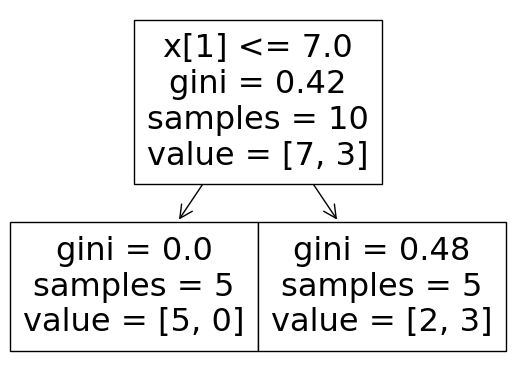

In [56]:
plot_tree(dt2)

<Axes: >

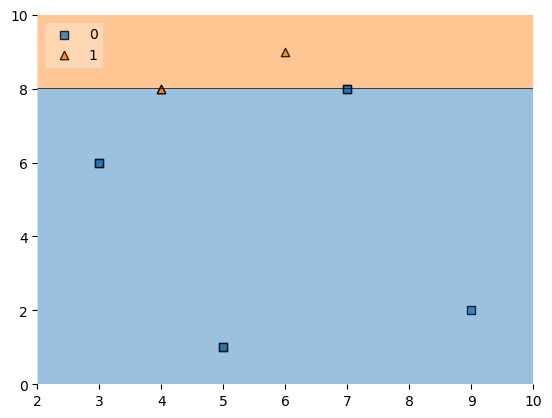

In [57]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [58]:
second_df['y_pred']=dt2.predict(x)

In [59]:
second_df

,x1,x2,label,sample_weights,y_pred
4,5,1,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
7,7,8,0,0.1,1
9,9,2,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1
7,7,8,0,0.1,1
3,4,8,1,0.1,1


In [60]:
alpha2=calculate_model_weight(0.2)

In [61]:
alpha2

0.6931471805599453

In [63]:
def update_row_weights(row,alpha=0.693):
    if row['label']==row['y_pred']:
        return row['sample_weights']*np.exp(-alpha)
    else:
        return row['sample_weights']*np.exp(alpha)

In [69]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)

In [70]:
second_df

,x1,x2,label,sample_weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007
4,5,1,0,0.1,0,0.050007
7,7,8,0,0.1,1,0.199971
9,9,2,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007
5,6,9,1,0.1,1,0.050007
3,4,8,1,0.1,1,0.050007
7,7,8,0,0.1,1,0.199971
3,4,8,1,0.1,1,0.050007


In [74]:
second_df['sample_weights'].sum()

1.0

In [78]:
second_df["updated_weights"].sum()

0.800000008664847

In [80]:
second_df["normalised_weights"]=second_df["updated_weights"]/second_df["updated_weights"].sum()

In [81]:
second_df

,x1,x2,label,sample_weights,y_pred,updated_weights,normalised_weights
4,5,1,0,0.1,0,0.050007,0.062509
2,3,6,0,0.1,0,0.050007,0.062509
4,5,1,0,0.1,0,0.050007,0.062509
7,7,8,0,0.1,1,0.199971,0.249963
9,9,2,0,0.1,0,0.050007,0.062509
2,3,6,0,0.1,0,0.050007,0.062509
5,6,9,1,0.1,1,0.050007,0.062509
3,4,8,1,0.1,1,0.050007,0.062509
7,7,8,0,0.1,1,0.199971,0.249963
3,4,8,1,0.1,1,0.050007,0.062509


In [82]:
second_df["normalised_weights"].sum()

1.0

In [83]:
np.cumsum(second_df['normalised_weights'])

4    0.062509
2    0.125018
4    0.187528
7    0.437491
9    0.500000
2    0.562509
5    0.625018
3    0.687528
7    0.937491
3    1.000000
Name: normalised_weights, dtype: float64

In [84]:
second_df['cumsum_upper']=np.cumsum(second_df['normalised_weights'])


In [85]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalised_weights']

In [86]:
second_df[['x1','x2','label','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,y_pred,updated_weights,cumsum_lower,cumsum_upper
4,5,1,0,0,0.050007,0.000000,0.062509
2,3,6,0,0,0.050007,0.062509,0.125018
4,5,1,0,0,0.050007,0.125018,0.187528
7,7,8,0,1,0.199971,0.187528,0.437491
9,9,2,0,0,0.050007,0.437491,0.500000
2,3,6,0,0,0.050007,0.500000,0.562509
5,6,9,1,1,0.050007,0.562509,0.625018
3,4,8,1,1,0.050007,0.625018,0.687528
7,7,8,0,1,0.199971,0.687528,0.937491
3,4,8,1,1,0.050007,0.937491,1.000000


In [87]:
indexes=[]
for i in range(second_df.shape[0]):
    a=np.random.random()
    for index,row in second_df.iterrows():
        if row['cumsum_upper']>a and a >row['cumsum_lower']:
            indexes.append(index)

In [88]:
indexes

[7, 7, 2, 4, 2, 7, 4, 7, 4, 7]

In [89]:
third_df=second_df.iloc[indexes]

In [90]:
third_df

,x1,x2,label,sample_weights,y_pred,updated_weights,normalised_weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,1,0.050007,0.062509,0.687528,0.625018
3,4,8,1,0.1,1,0.050007,0.062509,0.687528,0.625018
4,5,1,0,0.1,0,0.050007,0.062509,0.187528,0.125018
9,9,2,0,0.1,0,0.050007,0.062509,0.500000,0.437491
4,5,1,0,0.1,0,0.050007,0.062509,0.187528,0.125018
3,4,8,1,0.1,1,0.050007,0.062509,0.687528,0.625018
9,9,2,0,0.1,0,0.050007,0.062509,0.500000,0.437491
3,4,8,1,0.1,1,0.050007,0.062509,0.687528,0.625018
9,9,2,0,0.1,0,0.050007,0.062509,0.500000,0.437491
3,4,8,1,0.1,1,0.050007,0.062509,0.687528,0.625018
